### Case Study: Employee Salary Dataset

Gradient Descent: RMSE = 4.76e+00, MSE = 2.27e+01


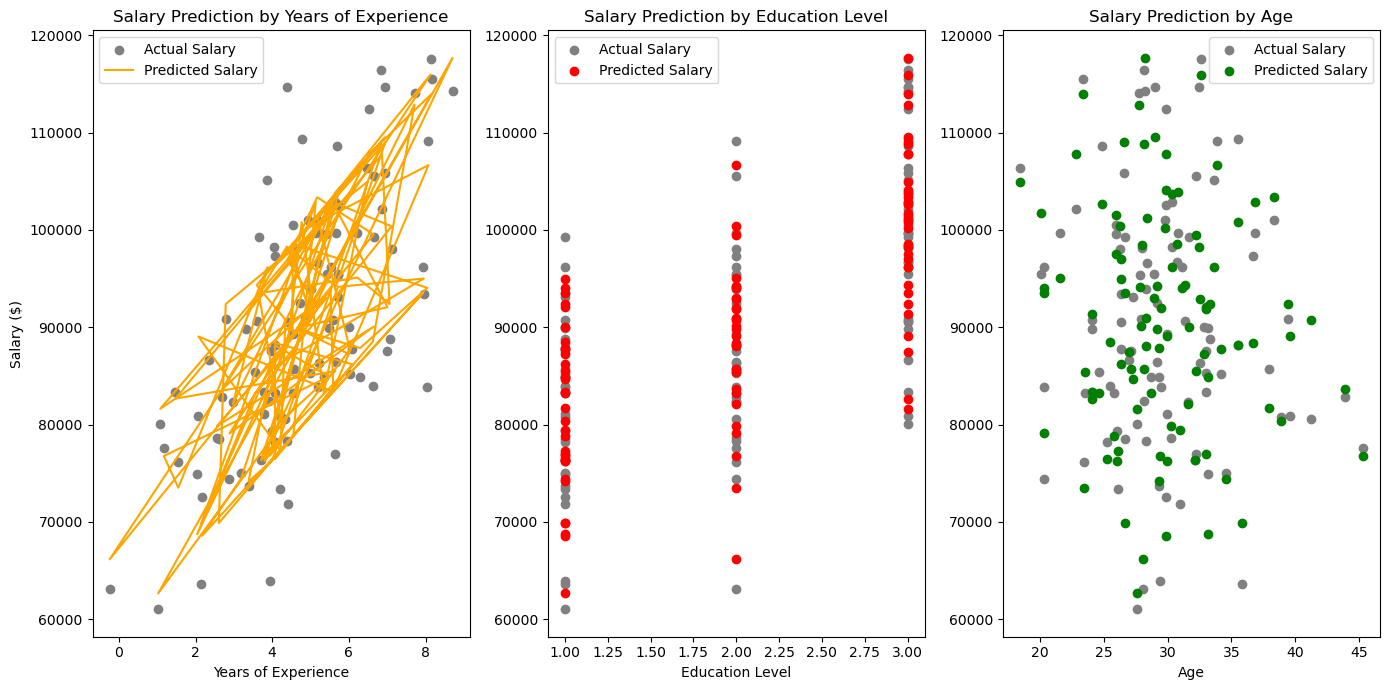

In [11]:
# importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

np.random.seed(42)

# Generating a synthetic employee salary dataset
years_experience = np.random.normal(5, 2, 100)  # Mean of 5 years, std of 2
education_level = np.random.randint(1, 4, 100)  # 1 for High School, 2 for Bachelor's, 3 for Master's
age = np.random.normal(30, 5, 100)  # Mean age of 30, std of 5
salary = 40000 + (years_experience * 5000) + (education_level * 10000) + (age * 200) + np.random.normal(0, 5000, 100)

# Creating a DataFrame
df = pd.DataFrame({'years_experience': years_experience, 'education_level': education_level, 'age': age, 'salary': salary})

# Preparing the data for modeling
X = df[['years_experience', 'education_level', 'age']].values
y = df['salary'].values

# Feature scaling for better gradient descent performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Adding a column of ones for the intercept term
X_scaled = np.column_stack((np.ones(X_scaled.shape[0]), X_scaled))

# Gradient Descent Function
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    theta = np.zeros((X.shape[1], 1))
    cost_history = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y.reshape(-1, 1)
        gradients = 2/m * X.T.dot(errors)
        theta -= learning_rate * gradients
        cost = np.sum(errors ** 2) / (2 * m)
        cost_history.append(cost)

    return theta, cost_history

# Running Gradient Descent
theta_gd, cost_history_gd = gradient_descent(X_scaled, y, learning_rate=0.01, iterations=1000)

# Predicting using the coefficients from Gradient Descent
y_pred_gd = X_scaled.dot(theta_gd)

# Plotting the results
# Since we have multiple features, we can't directly plot salary vs. all features in a 2D graph.
# Instead, we'll plot the salary against each feature individually.

plt.figure(figsize=(14, 7))

print(f"Gradient Descent: RMSE = {rmse_gd_vs_normal:.2e}, MSE = {mse_gd_vs_normal:.2e}")

# Plotting salary vs. years of experience
plt.subplot(1, 3, 1)
plt.scatter(df['years_experience'], y, color='gray', label='Actual Salary')
plt.plot(df['years_experience'], y_pred_gd, color='orange', label='Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.title('Salary Prediction by Years of Experience')
plt.legend()

# Plotting salary vs. education level
plt.subplot(1, 3, 2)
plt.scatter(df['education_level'], y, color='gray', label='Actual Salary')
plt.scatter(df['education_level'], y_pred_gd, color='red', label='Predicted Salary')
plt.xlabel('Education Level')
plt.title('Salary Prediction by Education Level')
plt.legend()

# Plotting salary vs. age
plt.subplot(1, 3, 3)
plt.scatter(df['age'], y, color='gray', label='Actual Salary')
plt.scatter(df['age'], y_pred_gd, color='green', label='Predicted Salary')
plt.xlabel('Age')
plt.title('Salary Prediction by Age')
plt.legend()

plt.tight_layout()
plt.show()

The RMSE and MSE scores are very close to zero representing that the gradient desent model performs well in fitting the regression line with the actual data.

The above graph plots represent the prediciton of salary based on 3 different features such as "years of Experience', 'Educaiton level', and 'Age'.